In [1]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

from sklearn import linear_model

import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 5000
D = 1000
d = 20
nz = 10
sigma = 1
X = np.random.randn(N, D)
Xtest = np.random.randn(N, D)

nzW = np.random.choice(D, nz, replace=False)
nzw = np.random.choice(d, nz, replace=False)
W = np.zeros(D)
w = np.zeros(d)
W[nzW] = np.random.randn(nz)
w[nzw] = np.random.randn(nz)

Y = np.dot(X, W) + np.random.randn(N) * sigma
Ytest = np.dot(Xtest, W) + np.random.randn(N) * sigma

y = np.dot(X[:, :d], w) + np.random.randn(N) * sigma
ytest = np.dot(Xtest[:, :d], w) + np.random.randn(N) * sigma


Regr = linear_model.LinearRegression()
regr = linear_model.LinearRegression()

tr_errs = []
Tr_errs = []
tst_errs = []
Tst_errs = []

for n in range(50, N + 1, 50):
    Regr.fit(X[:n, :], Y[:n])
    regr.fit(X[:n, :d], y[:n])
   
    Tr_errs.append(np.mean((Regr.predict(X[:n, :]) - Y[:n])**2))
    tr_errs.append(np.mean((regr.predict(X[:n, :d]) - y[:n])**2))
    Tst_errs.append(np.mean((Regr.predict(Xtest) - Ytest)**2))
    tst_errs.append(np.mean((regr.predict(Xtest[:, :d]) - ytest)**2))

<IPython.core.display.Javascript object>


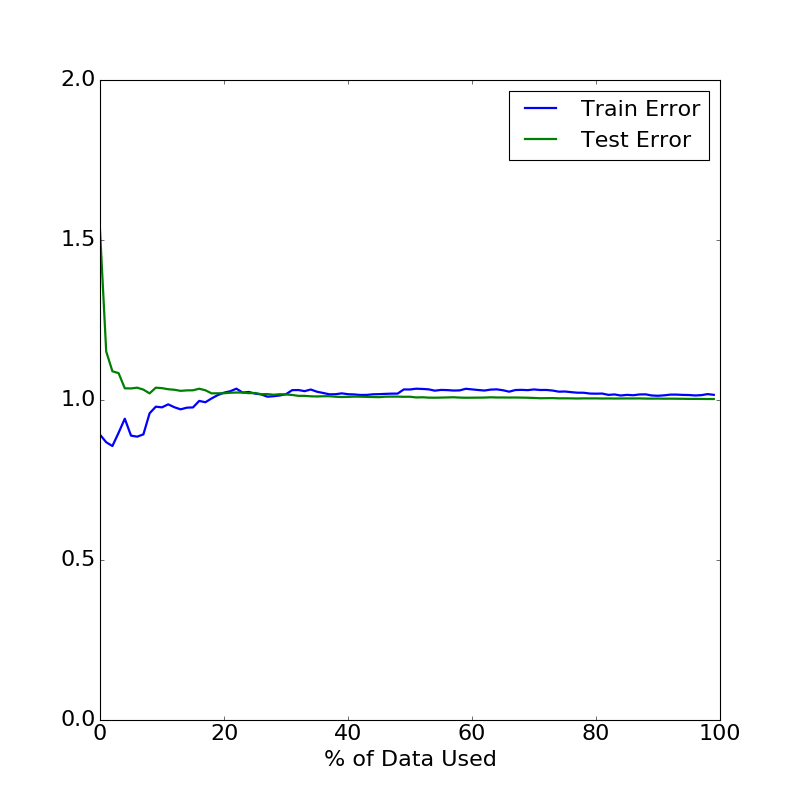

In [3]:
def plotLearningCurves(tr_errs, tst_errs):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_ylim((0, 2))
    ax.tick_params(axis='both', labelsize='20')
    ax.plot(tr_errs, label='Train Error', lw=2)
    ax.plot(tst_errs, label='Test Error', lw=2)
    ax.set_xlabel('% of Data Used', fontsize=20)
    ax.legend(fontsize=20)

plotLearningCurves(tr_errs, tst_errs)
plt.savefig('underfitting.png')